In [36]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import warnings
warnings.filterwarnings('ignore')

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['MS Gothic', 'Yu Gothic', 'Meiryo']
plt.rcParams['axes.unicode_minus'] = False

In [37]:
# 1. Ski.csvのデータを読み込む(スキー場名は削除する)
df = pd.read_csv('Ski.csv', index_col=0, encoding='shift-jis')
print("データの形状:", df.shape)
print("\nデータの先頭:")
display(df.head(10))
print("\n基本統計量:")
display(df.describe())

データの形状: (24, 9)

データの先頭:


,好き,洒落,特色,動的,明い,強い,固い,安定,小い
ニセコヒ,5,5,6,3,3,3,5,3,2
志賀高原,7,6,6,6,6,5,5,6,2
万座温泉,3,3,3,3,3,3,5,5,3
グランデ,5,5,5,5,5,5,5,5,3
トマムリ,3,3,3,5,5,6,2,3,5
上越国際,6,6,6,2,2,3,2,3,6
安比高原,5,6,6,5,5,5,5,5,2
野沢温泉,2,2,3,2,1,2,5,6,2
蔵王スキ,3,2,2,2,3,3,6,6,2
舞子後楽,7,6,6,2,2,2,2,3,7



基本統計量:


,好き,洒落,特色,動的,明い,強い,固い,安定,小い
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,3.833333,3.791667,4.041667,3.375000,3.500000,3.500000,4.208333,4.333333,3.583333
std,2.035910,1.793204,1.680558,1.739878,1.641844,1.351328,1.841058,1.606148,1.717345
min,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
25%,2.000000,2.000000,3.000000,2.000000,2.000000,2.750000,2.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,5.000000,3.000000
75%,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,6.000000,6.000000,5.000000
max,7.000000,6.000000,7.000000,6.000000,6.000000,6.000000,7.000000,7.000000,7.000000


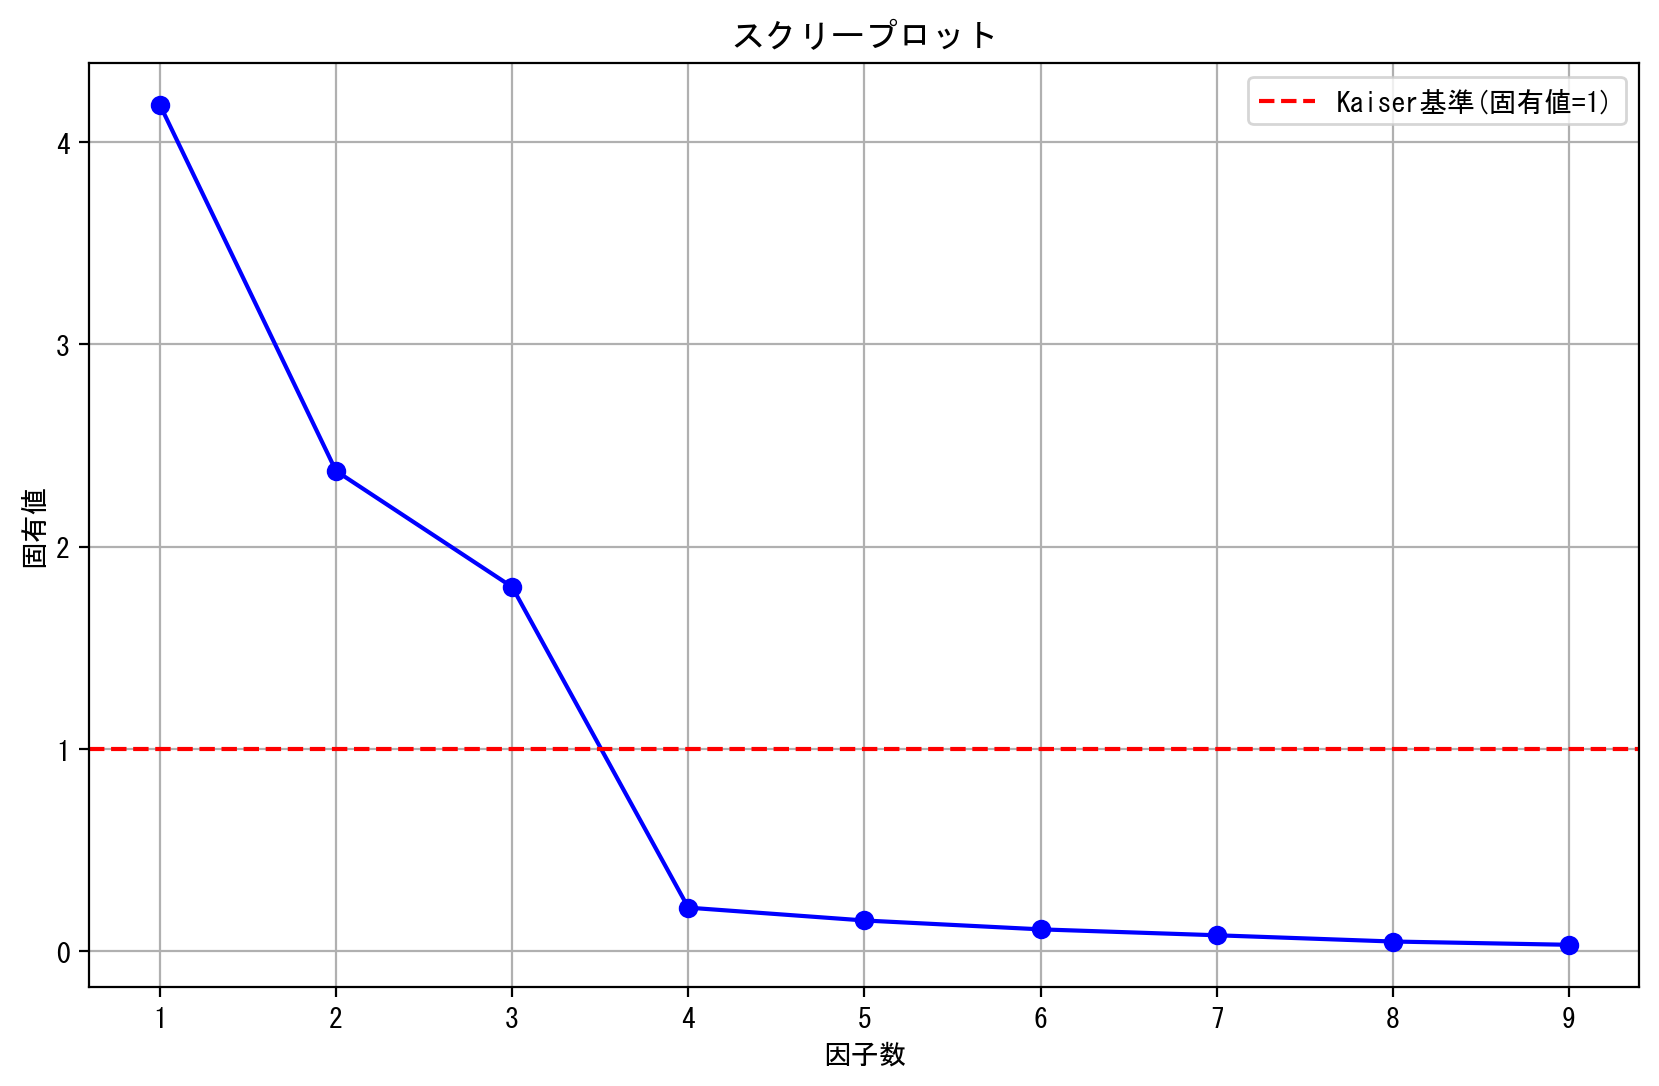

固有値:
Factor 1: 4.184
Factor 2: 2.375
Factor 3: 1.801
Factor 4: 0.216
Factor 5: 0.153
Factor 6: 0.109
Factor 7: 0.080
Factor 8: 0.049
Factor 9: 0.033


In [38]:
# 2. スクリープロットを描画して、適切な共通因子数を選ぶ
# 因子分析の実行(回転なし、最大因子数で)
fa = FactorAnalyzer(n_factors=df.shape[1], rotation=None, method='ml')
fa.fit(df)

# 固有値の取得
ev, v = fa.get_eigenvalues()

# スクリープロット
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ev) + 1), ev, 'bo-')
plt.axhline(y=1, color='r', linestyle='--', label='Kaiser基準(固有値=1)')
plt.xlabel('因子数')
plt.ylabel('固有値')
plt.title('スクリープロット')
plt.grid(True)
plt.legend()
plt.xticks(range(1, len(ev) + 1))
plt.show()

print("固有値:")
for i, eigenvalue in enumerate(ev, 1):
    print(f"Factor {i}: {eigenvalue:.3f}")

In [39]:
# 3. 適切な共通因子数を用いて、プロマックス回転、最尤法で因子分析を行う
# スクリープロットから適切な因子数を選択(ここでは3因子とする)
n_factors = 3

# scipy.diagなどの問題を回避するために、numpyの関数をscipyに追加
import scipy as sp
if not hasattr(sp, 'diag'):
    sp.diag = np.diag
if not hasattr(sp, 'sqrt'):
    sp.sqrt = np.sqrt
if not hasattr(sp, 'dot'):
    sp.dot = np.dot

fa = FactorAnalyzer(n_factors=n_factors, rotation='promax', method='ml')
fa.fit(df)

print(f"因子数: {n_factors}")
print("プロマックス回転による因子分析(最尤法)を実行しました。")

因子数: 3
プロマックス回転による因子分析(最尤法)を実行しました。


In [40]:
# 4. 因子負荷量、因子得点、独自因子の割合、各共通因子の寄与を計算

# 4.1 因子負荷量
loadings = fa.loadings_
df_loadings = pd.DataFrame(
    loadings,
    index=df.columns,
    columns=[f'Factor{i+1}' for i in range(n_factors)]
)
print("=" * 60)
print("因子負荷量:")
print("=" * 60)
display(df_loadings)

# 4.2 因子得点
factor_scores = fa.transform(df)
df_scores = pd.DataFrame(
    factor_scores,
    index=df.index,
    columns=[f'Factor{i+1}' for i in range(n_factors)]
)
print("\n" + "=" * 60)
print("因子得点:")
print("=" * 60)
display(df_scores)

# 4.3 独自因子の割合(共通性)
communalities = fa.get_communalities()
df_communalities = pd.DataFrame({
    '共通性': communalities,
    '独自因子の割合': 1 - communalities
}, index=df.columns)
print("\n" + "=" * 60)
print("共通性と独自因子の割合:")
print("=" * 60)
display(df_communalities)

# 4.4 各共通因子の寄与(分散の説明率)
variance = fa.get_factor_variance()
df_variance = pd.DataFrame(
    variance,
    columns=[f'Factor{i+1}' for i in range(n_factors)],
    index=['SS Loadings(因子寄与)', 'Proportion Var(寄与率)', 'Cumulative Var(累積寄与率)']
)
print("\n" + "=" * 60)
print("各共通因子の寄与:")
print("=" * 60)
display(df_variance)

因子負荷量:


,Factor1,Factor2,Factor3
好き,0.942902,-0.004347,0.010143
洒落,0.974212,0.054577,-0.008605
特色,0.942451,-0.025292,-0.001663
動的,0.033807,0.982529,0.022870
明い,0.023925,0.915334,-0.039300
強い,-0.033451,0.930287,0.022516
固い,0.000965,-0.136607,0.912502
安定,0.089129,-0.040118,0.879204
小い,0.092911,-0.159730,-0.974775



因子得点:


,Factor1,Factor2,Factor3
ニセコヒ,0.736712,-0.254410,0.460514
志賀高原,1.258831,1.469926,0.761850
万座温泉,-0.459288,-0.256888,0.406543
グランデ,0.648176,0.948251,0.427290
トマムリ,-0.524176,1.105757,-1.063739
上越国際,1.278045,-0.768274,-1.257715
安比高原,1.168239,0.963040,0.659207
野沢温泉,-0.952460,-0.948936,0.730105
蔵王スキ,-0.967702,-0.690441,0.989874
舞子後楽,1.340806,-0.881276,-1.480940



共通性と独自因子の割合:


,共通性,独自因子の割合
好き,0.889187,0.110813
洒落,0.952142,0.047858
特色,0.888855,0.111145
動的,0.967029,0.032971
明い,0.839953,0.160047
強い,0.867060,0.132940
固い,0.851322,0.148678
安定,0.782553,0.217447
小い,0.984332,0.015668



各共通因子の寄与:


,Factor1,Factor2,Factor3
SS Loadings(因子寄与),2.745779,2.718055,2.558599
Proportion Var(寄与率),0.305087,0.302006,0.284289
Cumulative Var(累積寄与率),0.305087,0.607093,0.891381


In [41]:
# 5. biplot関数の定義
def biplot_fa(score_2d, loadings, load_labels=None):
    plt.figure(figsize=(10,10))
    r1 = 1.8
    r2 = 1.01
    if load_labels is None:
        load_labels = range(len(loadings))
    for i, coef in enumerate(loadings):
        plt.arrow(0, 0, coef[0]*r1, coef[1]*r1, color='r')    
        plt.text(coef[0]*r1*r2, coef[1]*r1*r2, load_labels[i],
                 color='b', fontsize=15)
    for i in range(len(score_2d)):
        plt.scatter(score_2d[i,0], score_2d[i,1], c='k', alpha=0.2)
    plt.xlabel('F_1')
    plt.ylabel('F_2')
    plt.grid()
    return None

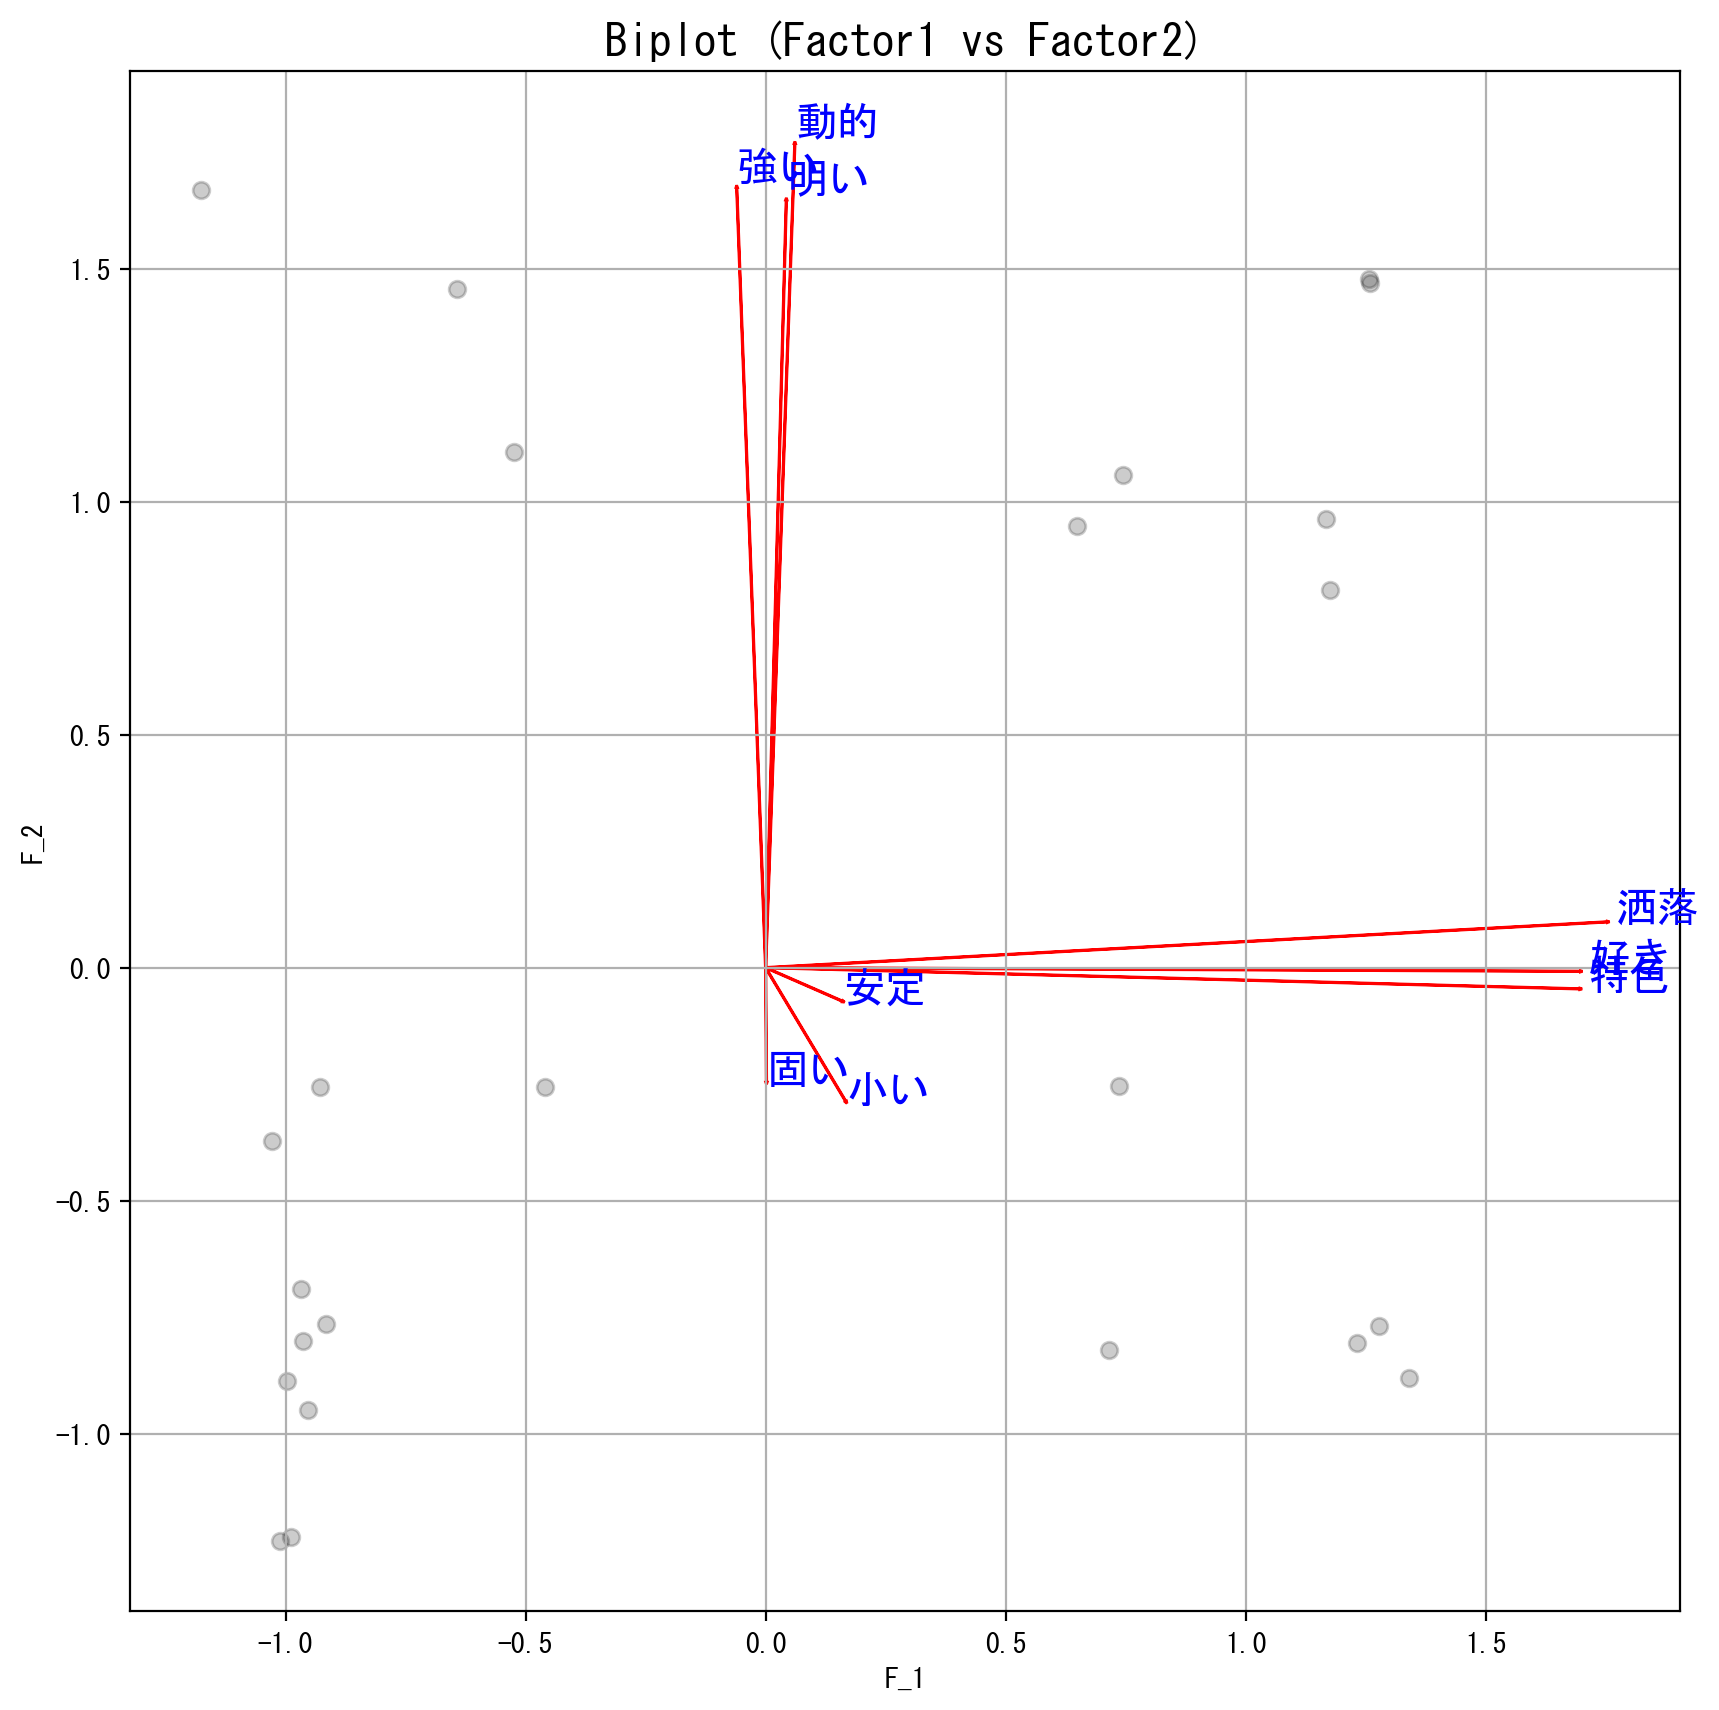

In [42]:
# 5. Factor1とFactor2を用いて、biplotを描画する
# Factor1とFactor2の因子得点と因子負荷量を取得
score_2d = factor_scores[:, :2]  # Factor1とFactor2の因子得点
loadings_2d = loadings[:, :2]    # Factor1とFactor2の因子負荷量

# biplotの描画
biplot_fa(score_2d, loadings_2d, load_labels=df.columns)
plt.title('Biplot (Factor1 vs Factor2)', fontsize=16)
plt.show()

In [43]:
# 6. Factor1からFactor3に対して各因子と対応している上位3つの変数を求める
# 因子負荷量の絶対値でソートし、上位3つの変数を取得
results = []
for i in range(1, n_factors + 1):
    col_name = "Factor{}".format(i)
    variables = df_loadings[col_name].abs().sort_values(ascending=False)[:3].index
    results.append([col_name, ",".join(variables)])

# DataFrame化
df_results = pd.DataFrame(results, columns=["Factor", "Top 3 Variables"])
print("=" * 60)
print("各因子に対応する上位3つの変数:")
print("=" * 60)
display(df_results)

各因子に対応する上位3つの変数:


,Factor,Top 3 Variables
0,Factor1,"洒落,好き,特色"
1,Factor2,"動的,強い,明い"
2,Factor3,"小い,固い,安定"


## 因子分析の結果まとめ

### 適切な共通因子数
**3因子**

スクリープロットより、固有値が1以上(Kaiser基準)の因子は3つ(4.184, 2.375, 1.801)であり、4因子目以降は固有値が1を下回る(0.216以下)ため、3因子が適切と判断されます。

### 共通因子で説明できる分散の割合
**89.14%** (累積寄与率)

- Factor1の寄与率: 30.51%
- Factor2の寄与率: 30.20%
- Factor3の寄与率: 28.43%
- 累積寄与率: 89.14%

3因子で全体の約89%の分散を説明できており、十分な説明力を持っています。

### 各因子と対応している上位3つの変数

**Factor 1:** 洒落、好き、特色
- 「洒落ている」「好き」「特色がある」という変数に高い負荷量を示しており、スキー場の**魅力・嗜好性**を表す因子と解釈できます。

**Factor 2:** 動的、強い、明い
- 「動的」「強い」「明るい」という変数に高い負荷量を示しており、スキー場の**活動性・エネルギー**を表す因子と解釈できます。

**Factor 3:** 小い、固い、安定
- 「小さい」「固い」「安定している」という変数に高い負荷量を示しており、スキー場の**規模・安定性**を表す因子と解釈できます。